# Red Neuronal Multicapa con scikit-learn: Iris

En este notebook vamos a:

1. Cargar el dataset Iris.
2. Separar datos en entrenamiento y prueba.
3. Crear una red neuronal multicapa usando `MLPClassifier`.
4. Entrenarla y evaluarla.
5. Ver cómo se relaciona con el perceptrón que hicimos a mano.


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data   # 4 características
y = iris.target # 3 clases

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X.shape, X_train.shape, X_test.shape
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## Definir la red neuronal

Usamos:

- Una capa oculta con 5 neuronas (`hidden_layer_sizes=(5,)`).
- Función de activación ReLU.
- Hasta 1000 iteraciones para entrenar.

La idea es la misma que en el perceptrón simple: ajustar pesos y sesgos para reducir errores, solo que ahora con más neuronas y más capas.


In [4]:
clf = MLPClassifier(
    hidden_layer_sizes=(5,),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
precision = accuracy_score(y_test, y_pred)

print("Precisión en test:", precision)


Precisión en test: 0.9333333333333333


/Users/adibattista/Documents/GitHub/tup-25-p4/.venv/lib/python3.14/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [5]:
print("Ejemplo X_test[0]:", X_test[0])
print("Predicción del modelo:", clf.predict([X_test[0]])[0])
print("Etiqueta real:", y_test[0])
print("Clases:", iris.target_names)


Ejemplo X_test[0]: [6.1 2.8 4.7 1.2]
Predicción del modelo: 1
Etiqueta real: 1
Clases: ['setosa' 'versicolor' 'virginica']


## Conexión con el perceptrón

- Antes: una sola neurona binaria.
- Ahora: varias neuronas en capas, capaces de manejar 3 clases.

Pero la idea central es la misma:

1. Hay pesos y sesgos.
2. Se calcula una salida.
3. Se compara con la respuesta correcta.
4. Se ajustan los parámetros para reducir el error.

Solo automatizamos la parte pesada usando `scikit-learn`.


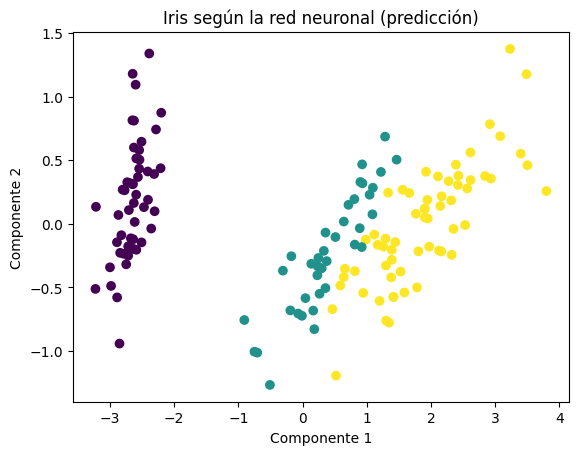

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

y_pred_all = clf.predict(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_all)
plt.title("Iris según la red neuronal (predicción)")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()
